In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [135]:
df = pd.read_csv(r'C:\Users\vchan\OneDrive\Desktop\45-days-of-ml\datasets\loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## Finding Null values

In [136]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## HeatMap

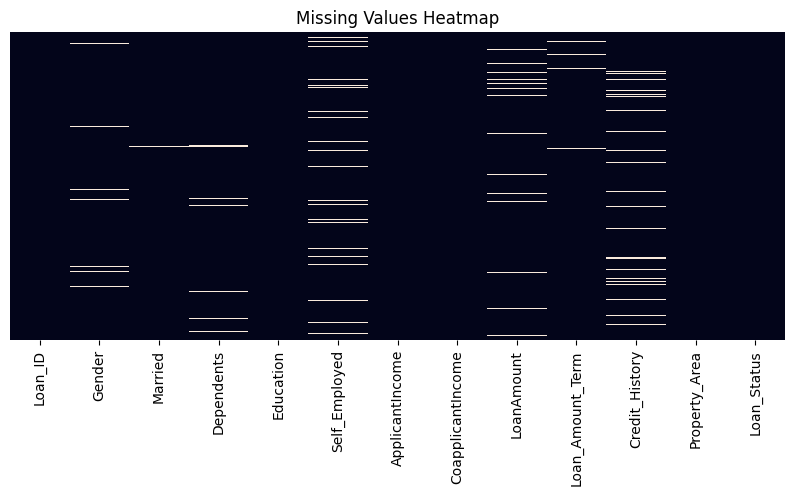

In [137]:
plt.figure(figsize=(10,4))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

## Data Cleaning and Feature Handling

### 1️⃣ Categorical columns

In [138]:
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed']:
    df[col].fillna(df[col].mode()[0],inplace=True)

C:\Users\vchan\AppData\Local\Temp\ipykernel_5832\511054281.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0],inplace=True)


In [139]:
df[['Gender', 'Married', 'Dependents', 'Self_Employed']].isnull().sum()

Gender           0
Married          0
Dependents       0
Self_Employed    0
dtype: int64

### Explaination:
1. These are the category columns so they dont have any numeric value
2. Mode keeps the decision intact
3. Missingness is relative small

### 2️⃣ Numeric column

In [140]:
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

C:\Users\vchan\AppData\Local\Temp\ipykernel_5832\2294035902.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)


In [141]:
df['LoanAmount'].isnull().sum()

np.int64(0)

### Explaination
1. LoanAmount is skewed
2. Outliers exist
3. Median is robust to extremes

In [142]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])

In [143]:
df['Loan_Amount_Term'].isnull().sum()

np.int64(0)

### Explaination
1. Usually the term is for 240-360 months in dataset, mode adds the most value to it

In [144]:
df['Dependents'] = df['Dependents'].replace('3+',3)
df['Dependents'] = df['Dependents'].astype(int)

### Explaination
1. This could have caused problem

### 3️⃣ Special case

In [145]:
df['Credit_History'] = df['Credit_History'].fillna(0)

In [146]:
df['Credit_History'].isnull().sum()

np.int64(0)

### Explaination
1. Credit history cannot be determined, it is choice of user to add it. If users adds it then great otherwise it cannot be predicted

## Now we start with ML part

### --> Categorical Encoding

In [147]:
df['Loan_Status'] = df['Loan_Status'].map({'N': 0, 'Y': 1})
df['Loan_Status'].value_counts()

Loan_Status
1    422
0    192
Name: count, dtype: int64

### --> One hot Encoding

In [148]:
categorical_cols = ['Gender','Married','Education','Self_Employed','Property_Area']
df = pd.get_dummies(df,columns=categorical_cols,drop_first=True)

### Finding Numerical Columns

In [149]:
df.select_dtypes(include=['int64', 'float64']).columns

Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status'],
      dtype='object')

### Inspecting Outliers

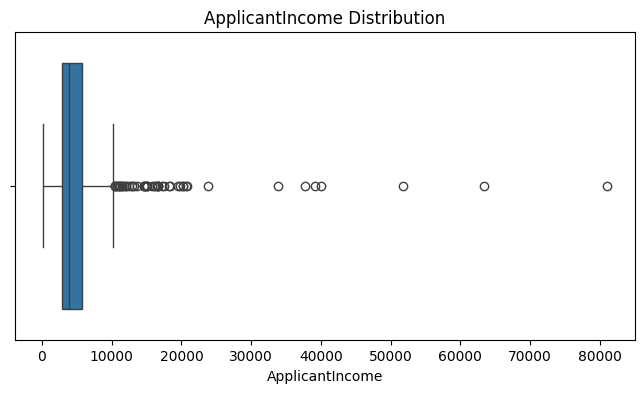

In [150]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df['ApplicantIncome'])
plt.title("ApplicantIncome Distribution")
plt.show()

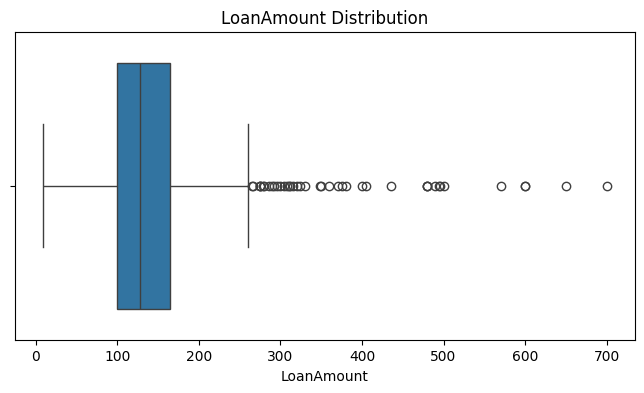

In [151]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df['LoanAmount'])
plt.title("LoanAmount Distribution")
plt.show()

### Some Numeric columns have very big values so its necessary to make them less

In [152]:
import numpy as np
df['ApplicantIncome_log'] = np.log1p(df['ApplicantIncome'])
df['CoapplicantIncome_log'] = np.log1p(df['CoapplicantIncome'])
df['LoanAmount_log'] = np.log1p(df['LoanAmount'])

In [153]:
df[['ApplicantIncome','ApplicantIncome_log','CoapplicantIncome','CoapplicantIncome_log','LoanAmount','LoanAmount_log']]

,ApplicantIncome,ApplicantIncome_log,CoapplicantIncome,CoapplicantIncome_log,LoanAmount,LoanAmount_log
0,5849,8.674197,0.0,0.000000,128.0,4.859812
1,4583,8.430327,1508.0,7.319202,128.0,4.859812
2,3000,8.006701,0.0,0.000000,66.0,4.204693
3,2583,7.857094,2358.0,7.765993,120.0,4.795791
4,6000,8.699681,0.0,0.000000,141.0,4.955827
...,...,...,...,...,...,...
609,2900,7.972811,0.0,0.000000,71.0,4.276666
610,4106,8.320448,0.0,0.000000,40.0,3.713572
611,8072,8.996280,240.0,5.484797,253.0,5.537334
612,7583,8.933796,0.0,0.000000,187.0,5.236442


## Scaling

In [154]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scale_cols = ['ApplicantIncome_log','CoapplicantIncome_log','LoanAmount_log','Loan_Amount_Term','Dependents']

df[scale_cols] = scaler.fit_transform(df[scale_cols])

## Dropping unecessary columns

In [155]:
df.drop(columns=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'],inplace=True)

In [157]:
df.drop(columns=['Loan_ID'], inplace=True)

In [158]:
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)
df

,Dependents,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log
0,-0.737806,0.273231,1.0,1,1,0,0,0,0,1,0.516186,-1.107783,-0.012803
1,0.253470,0.273231,1.0,0,1,1,0,0,0,0,0.137806,0.782158,-0.012803
2,-0.737806,0.273231,1.0,1,1,1,0,1,0,1,-0.519479,-1.107783,-1.348663
3,-0.737806,0.273231,1.0,1,1,1,1,0,0,1,-0.751605,0.897526,-0.143351
4,-0.737806,0.273231,1.0,1,1,0,0,0,0,1,0.555727,-1.107783,0.182981
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,-0.737806,0.273231,1.0,1,0,0,0,0,0,0,-0.572062,-1.107783,-1.201901
610,2.236021,-2.522836,1.0,1,1,1,0,0,0,0,-0.032679,-1.107783,-2.350110
611,0.253470,0.273231,1.0,1,1,1,0,0,0,1,1.015921,0.308483,1.368737
612,1.244745,0.273231,1.0,1,1,1,0,0,0,1,0.918972,-1.107783,0.755185


In [159]:
df.to_csv('Cleaned_finance.csv',index=False)